In [4]:
# import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%run utils/stat_helper_functions

packages imported


In [46]:
# read file
path = '/Users/mehipour/Desktop/data/'
file_path = path + 'R_lung_data_23-Sep-2020_nlsq.csv'
# file_path = path + 'R_lung_data_23-Sep-2020-poly3.csv'
df = pd.read_csv(file_path)

# remove space from column names and values
df.columns = df.columns.str.lstrip()
df['cohort'] = df['cohort'].str.lstrip()

# reivew data
df.head()


,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total,chi_sq,r_squred
0,20,Perfused,38.8500,234.5201,0.6266,214.0280,1437.4224,1.0000,1.0000,-0.0791,0.9543
1,20,Perfused,89.4167,194.6548,0.6604,215.3396,1236.7931,0.8250,0.9647,0.1397,0.9262
2,20,Perfused,107.7833,194.5101,0.6387,246.8889,1235.6266,0.7190,0.9648,0.0093,0.9276
3,20,Perfused,125.0500,167.0390,0.5835,269.8326,1291.7076,0.5650,0.7926,0.9564,0.8989
4,20,Perfused,142.5333,179.2310,0.6085,282.4547,1353.8017,0.5791,0.8115,0.0078,0.9201


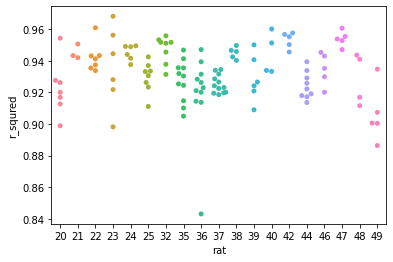

In [53]:
# check fit quality for rats
sns.swarmplot(x='rat', y='r_squred', size=5, data=df)
plt.show()

In [57]:
# apply linear regression for each rat to get atp2pi, atp2total and ec slopes
lm_total = LinearRegression()
lm_pi = LinearRegression()
lm_ec = LinearRegression()

# get weights
rats = df['rat'].unique()
df_summary = pd.DataFrame(columns=['cohort', 'slope_atp2total', 'intercept_atp2total',
                                   'slope_atp2pi', 'intercept_atp2pi', 'slope_ec', 'intercept_ec'], index=rats)

df_goodfits = df[df['r_squred'] > 0.93]

# linear regression
for rat in rats:
    # time
    df_rat = df_goodfits[df_goodfits['rat'] == rat]
    t_hr = df_rat['t_min'].values.reshape(-1,1)/60
    # atp2total
    y = df_rat['atp2total'].values.reshape(-1,1)
    lm_total.fit(t_hr,y)
    # atp2pi
    y = df_rat['atp2pi'].values.reshape(-1,1)
    lm_pi.fit(t_hr,y)
    # ec
    y = df_rat['ec'].values.reshape(-1,1)
    lm_ec.fit(t_hr,y)
    cohort = df[df['rat']==rat]['cohort'].unique()[0]
    df_summary.loc[rat] = [cohort,
                           -lm_total.coef_[0][0], lm_total.intercept_[0],
                           -lm_pi.coef_[0][0], lm_pi.intercept_[0],
                           -lm_ec.coef_[0][0], lm_ec.intercept_[0]] 
df_summary.head()

,cohort,slope_atp2total,intercept_atp2total,slope_atp2pi,intercept_atp2pi,slope_ec,intercept_ec
20,Perfused,0.0995802,1.09233,0.245427,1.16792,0.00946657,0.648483
21,Perfused,0.0406191,1.02348,0.204173,1.11093,-0.0446623,0.584178
22,Perfused,0.0408824,0.98954,0.149857,0.952009,-0.00700979,0.635091
23,Cold,0.0405265,1.04675,0.107705,0.989706,-0.00409366,0.603425
24,Cold,0.187863,1.18893,0.243199,1.06234,0.0578471,0.706158


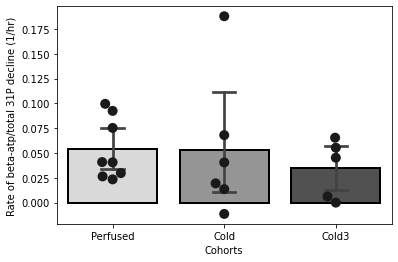

In [58]:
# show barplots for atp2total
ax = sns.barplot(x='cohort', y='slope_atp2total', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2total',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

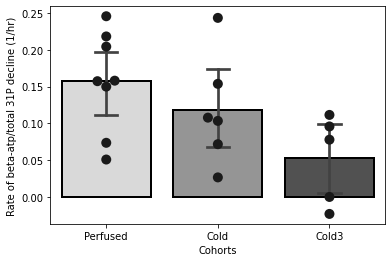

In [59]:
# show barplots for atp2pi
ax = sns.barplot(x='cohort', y='slope_atp2pi', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_atp2pi',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of beta-atp/total 31P decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

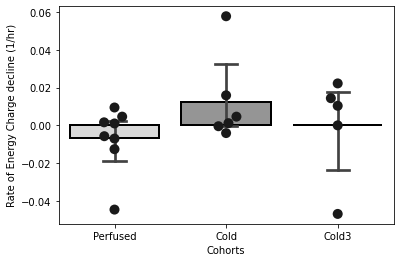

In [60]:
# show barplots for ec
ax = sns.barplot(x='cohort', y='slope_ec', 
                  capsize=0.2,
                  palette='Greys',
                  edgecolor='0.0',
                  linewidth=2,
                  data=df_summary)
ax = sns.swarmplot(x='cohort',y='slope_ec',
                    color = "0.1",
                    size = 10,
                    data=df_summary)
plt.ylabel('Rate of Energy Charge decline (1/hr)')
plt.xlabel('Cohorts')
plt.show()

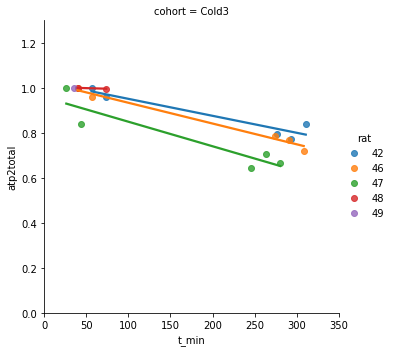

In [62]:
# look at individual decline of atp2total vs time for each group:
df_cold3 = df_goodfits[df_goodfits.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2total',
           hue='rat', col='cohort', ci=None, data=df_cold3)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()

In [21]:
df_cold3

,rat,cohort,t_min,atp,ec,pi,total,atp2pi,atp2total
103,42,Cold3,56.4333,223.7236,0.7409,179.2165,1438.4318,1.0000,1.0000
104,42,Cold3,73.5833,202.9386,0.6830,223.9461,1401.7844,0.7259,0.9308
105,42,Cold3,276.4833,181.0927,0.6539,265.2803,1401.2335,0.5468,0.8309
106,42,Cold3,293.6333,172.4391,0.6115,277.5396,1448.5052,0.4977,0.7654
107,42,Cold3,310.7833,212.0995,0.6640,321.5414,1538.3010,0.5284,0.8865
108,46,Cold3,39.6333,175.9201,0.7133,84.6311,949.3543,1.0000,1.0000
109,46,Cold3,56.7833,167.6811,0.7045,99.3901,940.7411,0.8116,0.9619
110,46,Cold3,274.0333,144.1648,0.6344,172.7809,950.4282,0.4014,0.8186
111,46,Cold3,308.3500,169.4982,0.6710,255.1193,1273.0717,0.3196,0.7185
112,46,Cold3,291.2000,140.5378,0.6317,160.1881,978.5966,0.4221,0.7750


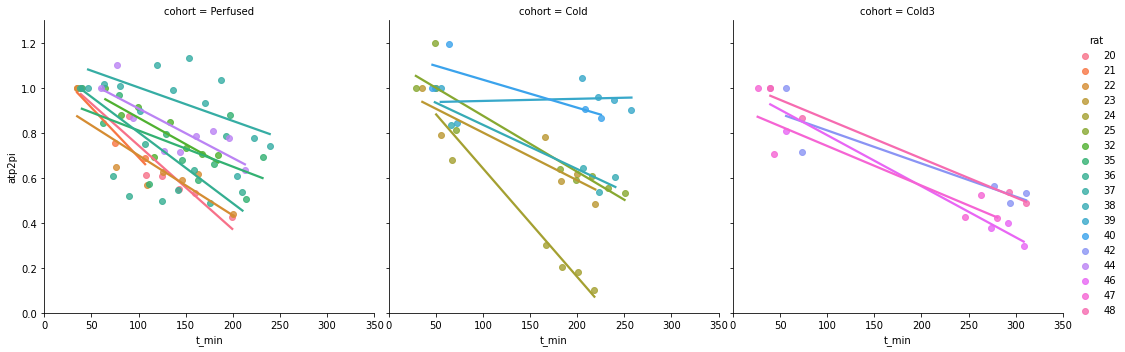

In [32]:
# look at individual decline of atp2pi vs time for each group:
df_cold3 = df[df.cohort=='Cold3']
sns.lmplot(x='t_min', y='atp2pi',
           hue='rat', col='cohort', ci=None, data=df)
plt.xlim([0,350])
plt.ylim([0,1.3])
plt.show()